[View in Colaboratory](https://colab.research.google.com/github/sayakgis/Handwritten_Digit_Prediction_DL-Work-in-progress-/blob/master/MNIST_CNN.ipynb)


---
# MNIST Handwritten images detection using CNN (Deep Learning)

---




**Collect data**

In [2]:
# Collect data
from tensorflow.examples.tutorials.mnist import input_data
MNIST=input_data.read_data_sets('MNIST_data',one_hot=True)


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [3]:
!ls        #Check directory for files

datalab  MNIST_data


**Training and Test data**

In [0]:
# Training dataset
trainX=MNIST.train.images
trainY=MNIST.train.labels

#Test Data
testX=MNIST.test.images
testY=MNIST.test.labels

**Shape of the data**

In [5]:
print('Training X size:',trainX.shape)
print('Training Y size:',trainY.shape)     #One hot encoded labels

print('Test X size:',testX.shape)
print('Test Y size:',testY.shape)


Training X size: (55000, 784)
Training Y size: (55000, 10)
Test X size: (10000, 784)
Test Y size: (10000, 10)


**How the data looks like?**

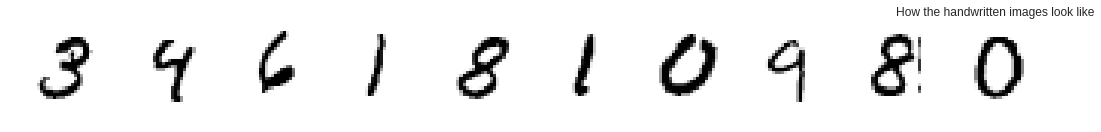

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=[20,5])

plt.subplots_adjust(hspace=0.2,wspace=0.2)

for i in range(1,11):
  plt.subplot(1,11,i)
  #plt.grid(axis=False)
  plt.axis('off')
  plt.imshow(np.reshape(trainX[i],(28,28)))
  
plt.title('How the handwritten images look like')  
plt.show()


**Set Random seed**

In [0]:
np.random.seed(42)

# Build the graph

**Using Keras to build the model**

![alt text](https://drive.google.com/drive/my-drive/model.JPG)

In [0]:
#Sequential model
from tensorflow.keras.models import Sequential

#Import Keras Layers
from tensorflow.keras.layers import MaxPool2D, Conv2D,Dense,Dropout,Reshape,Flatten

#Model Check point and Tensor board
from tensorflow.keras.callbacks import  ModelCheckpoint,TensorBoard

**Start a Sequential Model**

In [0]:
model=Sequential()

**Input (Reshape the Data)**

In [0]:
model.add(Reshape((28,28,1),input_shape=(784,)))

**Add First Convolution Layer** (32 filters, with 3 by 3 kernel and stride of 1)

In [0]:
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),activation='relu'))

**Add Second Convolution layer**(64 filters with 3 by 3 kernel and stride of 1)

In [0]:
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu'))

**Add Max Pooling Layer **(2 by 2)

In [0]:
model.add(MaxPool2D(pool_size=(2,2)))

**Add Drop Out of 25%**

In [0]:
model.add(Dropout(rate=0.25))

**Flatten the image **

In [0]:
model.add(Flatten())

**Add fully connected layer (128 neurons)**

In [0]:
model.add(Dense(units=128,activation='relu'))

**Add another Drop Out (50%)**

In [0]:
model.add(Dropout(0.50))

**Add Softmax**

In [0]:
model.add(Dense(10,activation='softmax'))

**Compile the model**

In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

**Define Checkpoint based on Best accuracy of test data**

In [0]:
checkpoint=ModelCheckpoint('mnist_keras_cnn-v1',monitor='val_acc',verbose=1,save_best_only=True,mode='max')

**Train and execute the graph**

In [22]:
model.fit(x=trainX,y=trainY,batch_size=100,epochs=30,validation_data=[testX,testY],callbacks=[checkpoint,TensorBoard(log_dir='')])

Train on 55000 samples, validate on 10000 samples
Epoch 1/30
55000/55000 [==============================] - 11s 193us/step - loss: 0.2509 - acc: 0.9235 - val_loss: 0.0558 - val_acc: 0.9834

Epoch 00001: val_acc improved from -inf to 0.98340, saving model to mnist_keras_cnn-v1
Epoch 2/30
55000/55000 [==============================] - 9s 169us/step - loss: 0.0714 - acc: 0.9794 - val_loss: 0.0508 - val_acc: 0.9835

Epoch 00002: val_acc improved from 0.98340 to 0.98350, saving model to mnist_keras_cnn-v1
Epoch 3/30
15200/55000 [=======>......................] - ETA: 6s - loss: 0.0494 - acc: 0.9859

55000/55000 [==============================] - 9s 169us/step - loss: 0.0464 - acc: 0.9863 - val_loss: 0.0347 - val_acc: 0.9884

Epoch 00003: val_acc improved from 0.98350 to 0.98840, saving model to mnist_keras_cnn-v1
Epoch 4/30
55000/55000 [==============================] - 9s 168us/step - loss: 0.0383 - acc: 0.9891 - val_loss: 0.0334 - val_acc: 0.9887

Epoch 00004: val_acc improved from 0.98840 to 0.98870, saving model to mnist_keras_cnn-v1
Epoch 5/30
32100/55000 [================>.............] - ETA: 3s - loss: 0.0280 - acc: 0.9917

55000/55000 [==============================] - 9s 168us/step - loss: 0.0288 - acc: 0.9913 - val_loss: 0.0382 - val_acc: 0.9883

Epoch 00005: val_acc did not improve from 0.98870
Epoch 6/30
55000/55000 [==============================] - 9s 168us/step - loss: 0.0237 - acc: 0.9929 - val_loss: 0.0312 - val_acc: 0.9907

Epoch 00006: val_acc improved from 0.98870 to 0.99070, saving model to mnist_keras_cnn-v1
Epoch 7/30
42600/55000 [======================>.......] - ETA: 1s - loss: 0.0203 - acc: 0.9937

55000/55000 [==============================] - 9s 169us/step - loss: 0.0207 - acc: 0.9935 - val_loss: 0.0352 - val_acc: 0.9902

Epoch 00007: val_acc did not improve from 0.99070
Epoch 8/30
55000/55000 [==============================] - 9s 169us/step - loss: 0.0178 - acc: 0.9942 - val_loss: 0.0414 - val_acc: 0.9894

Epoch 00008: val_acc did not improve from 0.99070
Epoch 9/30
47700/55000 [=========================>....] - ETA: 1s - loss: 0.0155 - acc: 0.9954

55000/55000 [==============================] - 9s 168us/step - loss: 0.0155 - acc: 0.9955 - val_loss: 0.0365 - val_acc: 0.9902

Epoch 00009: val_acc did not improve from 0.99070
Epoch 10/30
55000/55000 [==============================] - 9s 169us/step - loss: 0.0128 - acc: 0.9959 - val_loss: 0.0351 - val_acc: 0.9898

Epoch 00010: val_acc did not improve from 0.99070
Epoch 11/30
48100/55000 [=========================>....] - ETA: 1s - loss: 0.0114 - acc: 0.9965

55000/55000 [==============================] - 9s 167us/step - loss: 0.0125 - acc: 0.9962 - val_loss: 0.0366 - val_acc: 0.9897

Epoch 00011: val_acc did not improve from 0.99070
Epoch 12/30
55000/55000 [==============================] - 9s 168us/step - loss: 0.0119 - acc: 0.9963 - val_loss: 0.0415 - val_acc: 0.9895

Epoch 00012: val_acc did not improve from 0.99070
Epoch 13/30
49300/55000 [=========================>....] - ETA: 0s - loss: 0.0096 - acc: 0.9971

55000/55000 [==============================] - 9s 169us/step - loss: 0.0101 - acc: 0.9970 - val_loss: 0.0458 - val_acc: 0.9896

Epoch 00013: val_acc did not improve from 0.99070
Epoch 14/30
55000/55000 [==============================] - 9s 167us/step - loss: 0.0091 - acc: 0.9972 - val_loss: 0.0386 - val_acc: 0.9903

Epoch 00014: val_acc did not improve from 0.99070
Epoch 15/30
48900/55000 [=========================>....] - ETA: 0s - loss: 0.0079 - acc: 0.9973

55000/55000 [==============================] - 9s 168us/step - loss: 0.0082 - acc: 0.9972 - val_loss: 0.0585 - val_acc: 0.9889

Epoch 00015: val_acc did not improve from 0.99070
Epoch 16/30
55000/55000 [==============================] - 9s 168us/step - loss: 0.0090 - acc: 0.9975 - val_loss: 0.0365 - val_acc: 0.9916

Epoch 00016: val_acc improved from 0.99070 to 0.99160, saving model to mnist_keras_cnn-v1
Epoch 17/30
44000/55000 [=======================>......] - ETA: 1s - loss: 0.0089 - acc: 0.9974

55000/55000 [==============================] - 9s 168us/step - loss: 0.0086 - acc: 0.9974 - val_loss: 0.0446 - val_acc: 0.9907

Epoch 00017: val_acc did not improve from 0.99160
Epoch 18/30
55000/55000 [==============================] - 9s 167us/step - loss: 0.0070 - acc: 0.9979 - val_loss: 0.0347 - val_acc: 0.9919

Epoch 00018: val_acc improved from 0.99160 to 0.99190, saving model to mnist_keras_cnn-v1
Epoch 19/30
45100/55000 [=======================>......] - ETA: 1s - loss: 0.0075 - acc: 0.9979

55000/55000 [==============================] - 9s 167us/step - loss: 0.0076 - acc: 0.9977 - val_loss: 0.0406 - val_acc: 0.9913

Epoch 00019: val_acc did not improve from 0.99190
Epoch 20/30
55000/55000 [==============================] - 9s 168us/step - loss: 0.0058 - acc: 0.9982 - val_loss: 0.0466 - val_acc: 0.9909

Epoch 00020: val_acc did not improve from 0.99190
Epoch 21/30
48900/55000 [=========================>....] - ETA: 0s - loss: 0.0074 - acc: 0.9977

55000/55000 [==============================] - 9s 168us/step - loss: 0.0073 - acc: 0.9977 - val_loss: 0.0423 - val_acc: 0.9918

Epoch 00021: val_acc did not improve from 0.99190
Epoch 22/30
55000/55000 [==============================] - 9s 168us/step - loss: 0.0049 - acc: 0.9987 - val_loss: 0.0532 - val_acc: 0.9905

Epoch 00022: val_acc did not improve from 0.99190
Epoch 23/30
48600/55000 [=========================>....] - ETA: 1s - loss: 0.0070 - acc: 0.9980

55000/55000 [==============================] - 9s 169us/step - loss: 0.0067 - acc: 0.9980 - val_loss: 0.0437 - val_acc: 0.9926

Epoch 00023: val_acc improved from 0.99190 to 0.99260, saving model to mnist_keras_cnn-v1
Epoch 24/30
55000/55000 [==============================] - 9s 168us/step - loss: 0.0041 - acc: 0.9987 - val_loss: 0.0467 - val_acc: 0.9923

Epoch 00024: val_acc did not improve from 0.99260
Epoch 25/30
40100/55000 [====================>.........] - ETA: 2s - loss: 0.0066 - acc: 0.9980

55000/55000 [==============================] - 9s 169us/step - loss: 0.0067 - acc: 0.9980 - val_loss: 0.0493 - val_acc: 0.9896

Epoch 00025: val_acc did not improve from 0.99260
Epoch 26/30
55000/55000 [==============================] - 9s 169us/step - loss: 0.0057 - acc: 0.9984 - val_loss: 0.0493 - val_acc: 0.9918

Epoch 00026: val_acc did not improve from 0.99260
Epoch 27/30
47200/55000 [========================>.....] - ETA: 1s - loss: 0.0041 - acc: 0.9989

55000/55000 [==============================] - 9s 168us/step - loss: 0.0042 - acc: 0.9989 - val_loss: 0.0437 - val_acc: 0.9919

Epoch 00027: val_acc did not improve from 0.99260
Epoch 28/30
55000/55000 [==============================] - 9s 170us/step - loss: 0.0057 - acc: 0.9983 - val_loss: 0.0438 - val_acc: 0.9918

Epoch 00028: val_acc did not improve from 0.99260
Epoch 29/30
46900/55000 [========================>.....] - ETA: 1s - loss: 0.0047 - acc: 0.9987

55000/55000 [==============================] - 9s 169us/step - loss: 0.0044 - acc: 0.9988 - val_loss: 0.0457 - val_acc: 0.9925

Epoch 00029: val_acc did not improve from 0.99260
Epoch 30/30
55000/55000 [==============================] - 9s 170us/step - loss: 0.0041 - acc: 0.9987 - val_loss: 0.0560 - val_acc: 0.9903

Epoch 00030: val_acc did not improve from 0.99260


**Predict the images**

Predicted Number of picture 1830 is==> 1
Predicted Number of picture 3015 is==> 3
Predicted Number of picture 1060 is==> 4
Predicted Number of picture 5429 is==> 9
Predicted Number of picture 5759 is==> 1
Predicted Number of picture 4213 is==> 9
Predicted Number of picture 7862 is==> 8
Predicted Number of picture 1491 is==> 6
Predicted Number of picture 1205 is==> 3
Predicted Number of picture 6997 is==> 4


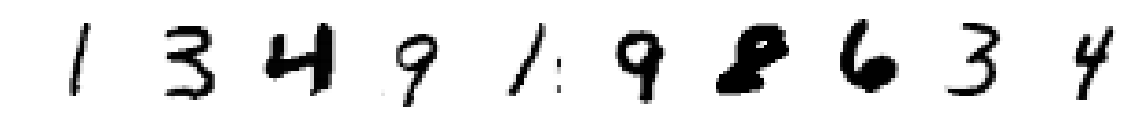

In [39]:
y_pred=model.predict(testX)


plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.1,wspace=0.1)

array_=np.random.randint(1,8000,11)

for i,j in zip(array_,range(1,11)):
  plt.subplot(1,10,j)
  print('Predicted Number of picture',i,'is==>',np.argmax(y_pred[i]))
  plt.imshow(np.reshape(testX[i],(28,28)))
  plt.axis('off')
  

**Lets check some wrong predictions**

In [0]:
import pandas as pd

In [61]:
df_compare=pd.DataFrame([np.argmax(y_pred,axis=1),np.argmax(testY,axis=1)]).T
df_compare.head()

,0,1
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [68]:
df_wrong=df_compare[df_compare[0]!=df_compare[1]]
print('Number of wrong predictions:',df_wrong.shape[0])

Number of wrong predictions: 97


Predicted Number of picture number: 92 is==> 4
Predicted Number of picture number: 321 is==> 7
Predicted Number of picture number: 340 is==> 3
Predicted Number of picture number: 404 is==> 7
Predicted Number of picture number: 591 is==> 3
Predicted Number of picture number: 646 is==> 6
Predicted Number of picture number: 659 is==> 1
Predicted Number of picture number: 674 is==> 3
Predicted Number of picture number: 844 is==> 7
Predicted Number of picture number: 947 is==> 9


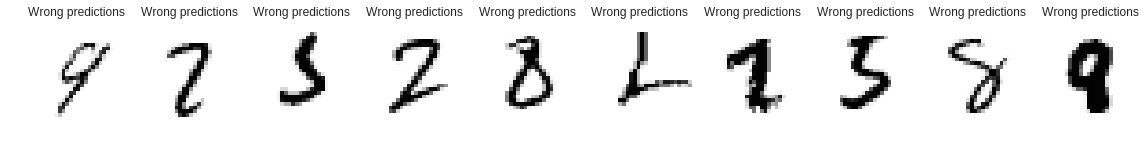

In [93]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.1,wspace=0.1)

ind=np.array(df_wrong.index[1:11])


for i, j in zip(ind,range(1,11)):
  plt.subplot(1,10,j)
  print('Predicted Number of picture number:',i,'is==>',np.argmax(y_pred[i]))
  plt.imshow(np.reshape(testX[i],(28,28)))
  plt.axis('off')
  plt.title('Wrong predictions')